# Importing the necessary libraries.

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Loading and reading the csv file as a pandas DataFrame.

In [2]:
uploaded = files.upload()

Saving Toyota.csv to Toyota.csv


In [221]:
import io
toyota = pd.read_csv(io.BytesIO(uploaded['Toyota.csv']), na_values=['??', '????'])
toyota.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [222]:
toyota.shape

(1436, 11)

In [223]:
# Removing unwanted column.
toyota.drop(['Unnamed: 0'], axis=1, inplace=True)

In [224]:
# Categorizing the Price Column.

toyota['Price_category'] = pd.qcut(toyota['Price'].values, q = 3, labels=['Low', 'Medium', 'High'] )
toyota['Price_category'].value_counts()

Low       578
High      447
Medium    411
Name: Price_category, dtype: int64

In [225]:
toyota.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_category
463,8750,47.0,69000.0,Diesel,69.0,1.0,0,1900,5,1140,Low
440,11950,54.0,77270.0,NaN,110.0,1.0,0,1600,4,1035,High
1185,6500,70.0,91900.0,Petrol,86.0,1.0,0,1300,3,1015,Low
855,8950,62.0,64966.0,Petrol,86.0,NaN,0,1300,3,1020,Low
625,8950,64.0,133769.0,Diesel,72.0,1.0,0,2000,3,1120,Low
31,15750,22.0,35199.0,Petrol,97.0,1.0,0,1400,3,1100,High
1162,7950,80.0,97548.0,Petrol,86.0,0.0,0,1300,5,1035,Low
81,17250,29.0,20000.0,Petrol,110.0,1.0,0,1600,5,1115,High
847,10950,67.0,65785.0,Petrol,110.0,NaN,0,1600,5,1075,Medium
671,8500,NaN,105000.0,Petrol,86.0,0.0,0,1300,5,1040,Low


# Handling data types.

In [226]:
# Check for missing values.

toyota.isnull().sum()

Price               0
Age               100
KM                 15
FuelType          100
HP                  6
MetColor          150
Automatic           0
CC                  0
Doors               0
Weight              0
Price_category      0
dtype: int64

In [227]:
# Checking data types.

toyota.dtypes

Price                int64
Age                float64
KM                 float64
FuelType            object
HP                 float64
MetColor           float64
Automatic            int64
CC                   int64
Doors               object
Weight               int64
Price_category    category
dtype: object

In [73]:
# Changing the datatypes.
toyota['FuelType'] = toyota['FuelType'].astype('category')
toyota['Automatic'] = toyota['Automatic'].astype('category')

In [152]:
toyota['CC'] = toyota['CC'].astype('category')

# Summary stats.

In [24]:
toyota.describe()

,Price,Age,KM,HP,MetColor,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,2000.000000,1615.00000


# EDA.

### Distribution of Price of cars.

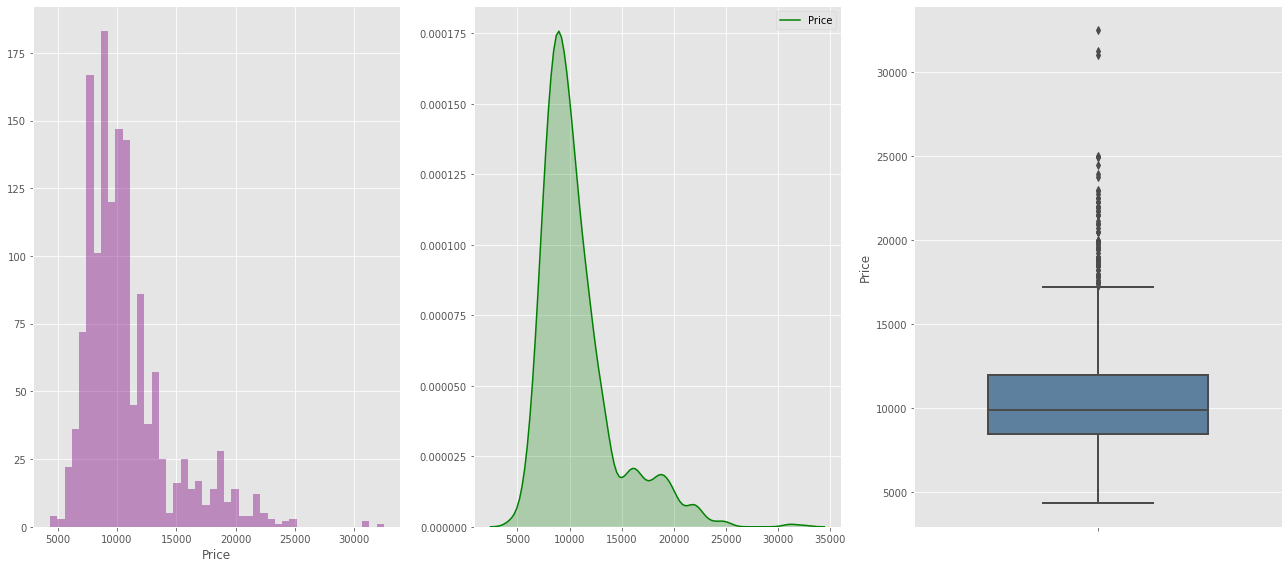

In [39]:
plt.figure(figsize=(18,8))
plt.style.use('ggplot')

plt.subplot(1,3,1)
sns.distplot(toyota['Price'], kde = False, color = 'purple')

plt.subplot(1,3,2)
sns.kdeplot(toyota.Price, shade=True, color = 'green', cumulative=False)

plt.subplot(1,3,3)
sns.boxplot(toyota.Price, width = .6, linewidth = 2, orient = 'v', color = 'steelblue', saturation = .6)

plt.tight_layout()
plt.show()

***The figure is slightly skewed to the right.***


### Distribution of the Price based on category.

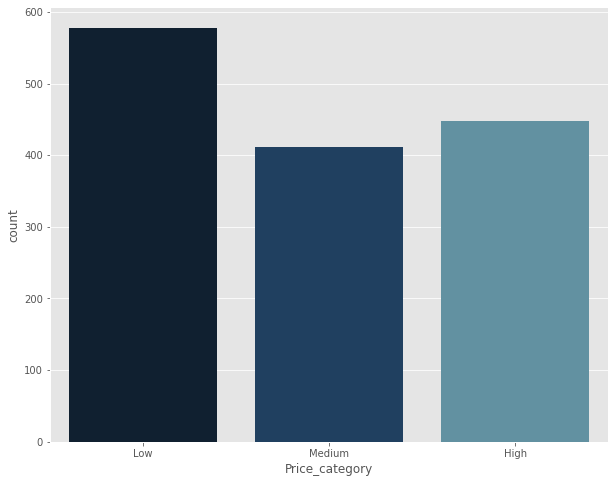

In [208]:
plt.figure(figsize = (10,8))

sns.countplot(toyota.Price_category, palette = 'ocean', saturation=.5)
plt.show()

In [212]:
# Value Counts.
toyota.Price_category.value_counts(normalize=True, sort = True) * 100

Low       40.250696
High      31.128134
Medium    28.621170
Name: Price_category, dtype: float64

### Distribution of Age of cars.

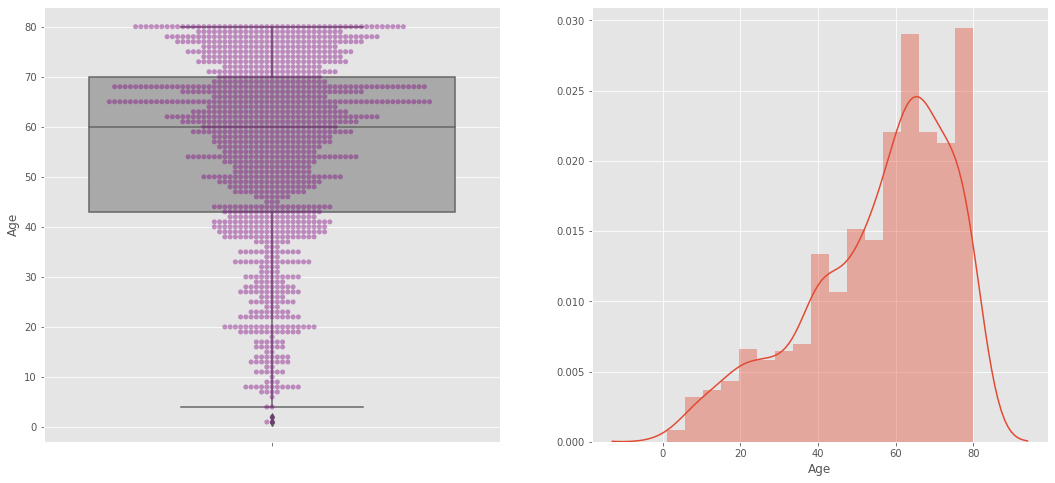

In [53]:
plt.figure(figsize=(18,8))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.swarmplot(toyota.Age,color = 'purple', alpha = .4, orient = 'v')
sns.boxplot(toyota.Age, color = 'darkgray', orient = 'v')

plt.subplot(1,2,2)
sns.distplot(toyota.Age)
plt.show()

***Skewed to the left.***



### Age of cars vs. Price.
- How does the price vary with age?

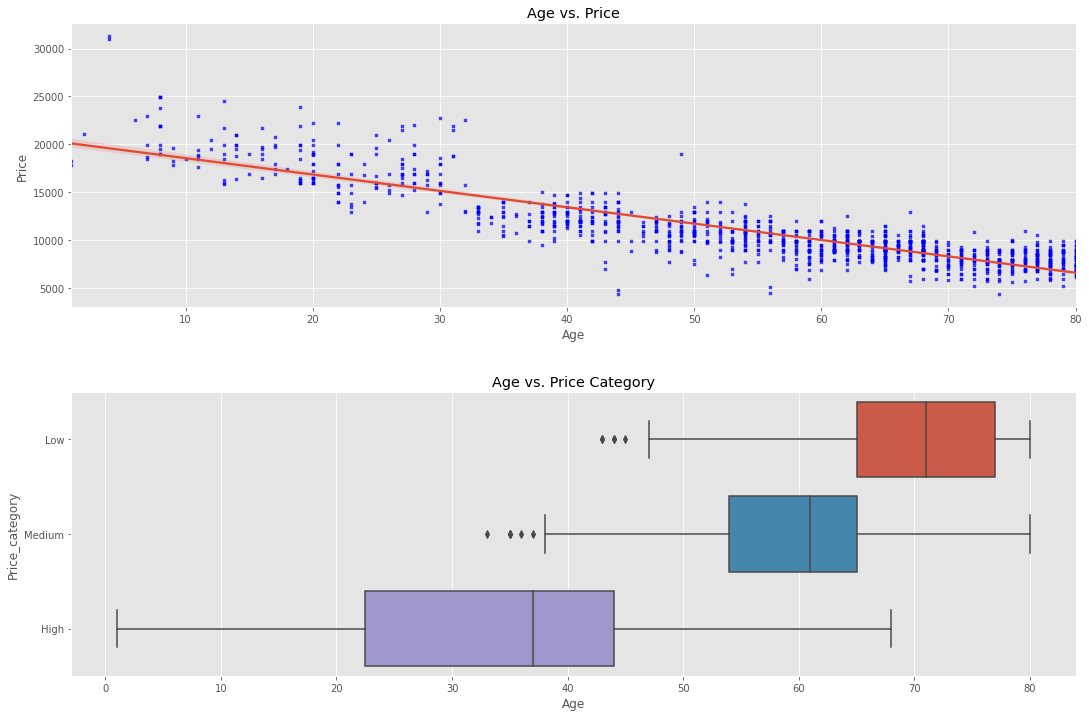

In [114]:
fig = plt.figure(figsize=(18,12))
plt.style.use('ggplot')

plt.subplot(2,1,1)
sns.regplot(x = toyota['Age'], y = toyota['Price'], scatter_kws={'alpha': .6, 's': 8, 'color': 'blue'}, marker = 'X', order = 1)
plt.title('Age vs. Price')

plt.subplot(2,1,2)
sns.boxplot(x = toyota['Age'], y = toyota['Price_category'])
plt.title('Age vs. Price Category')

plt.subplots_adjust(hspace=.3)
plt.show()

***General decrease in price when the cars age out.***

### Distribution of KM.

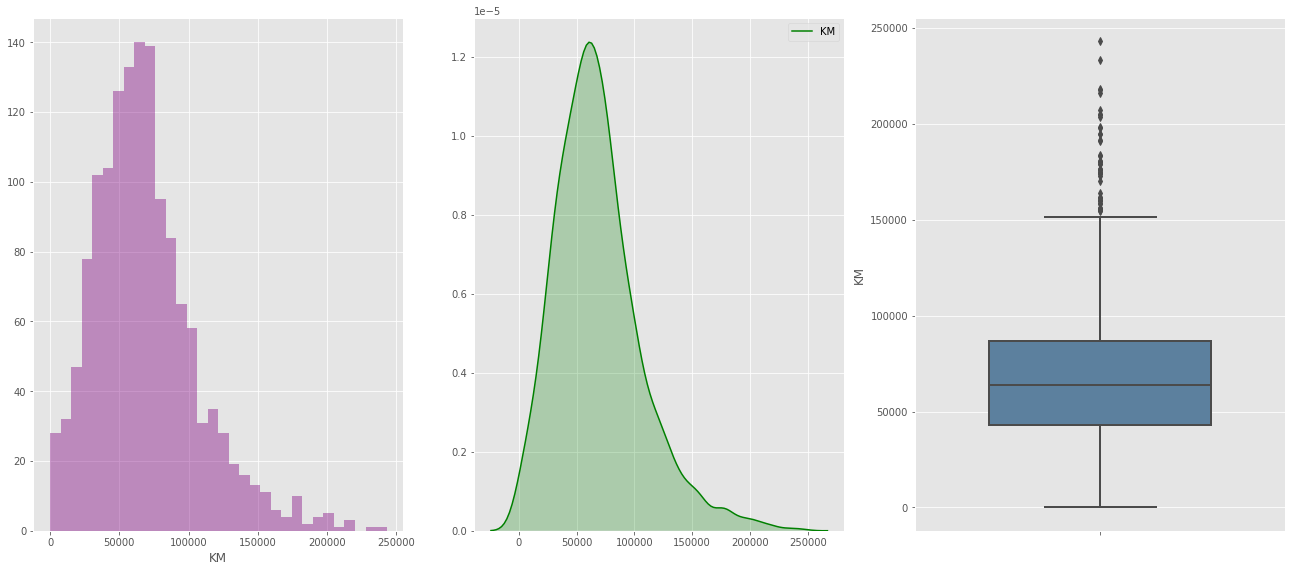

In [61]:
fig = plt.figure(figsize=(18,8))
plt.style.use('ggplot')

plt.subplot(1,3,1)
sns.distplot(toyota['KM'], kde = False, color = 'purple')

plt.subplot(1,3,2)
sns.kdeplot(toyota.KM, shade=True, color = 'green', cumulative=False)

plt.subplot(1,3,3)
sns.boxplot(toyota.KM, width = .6, linewidth = 2, orient = 'v', color = 'steelblue', saturation = .6)

plt.tight_layout(pad = .9)
#plt.subplots_adjust(top = 1.2)
#fig.suptitle('Distribution of KM travelled by the vehicle', fontsize = 16)
plt.show()

***Skewed to the right.***

### KM vs. Price.
- How does the price vary with distance covered?

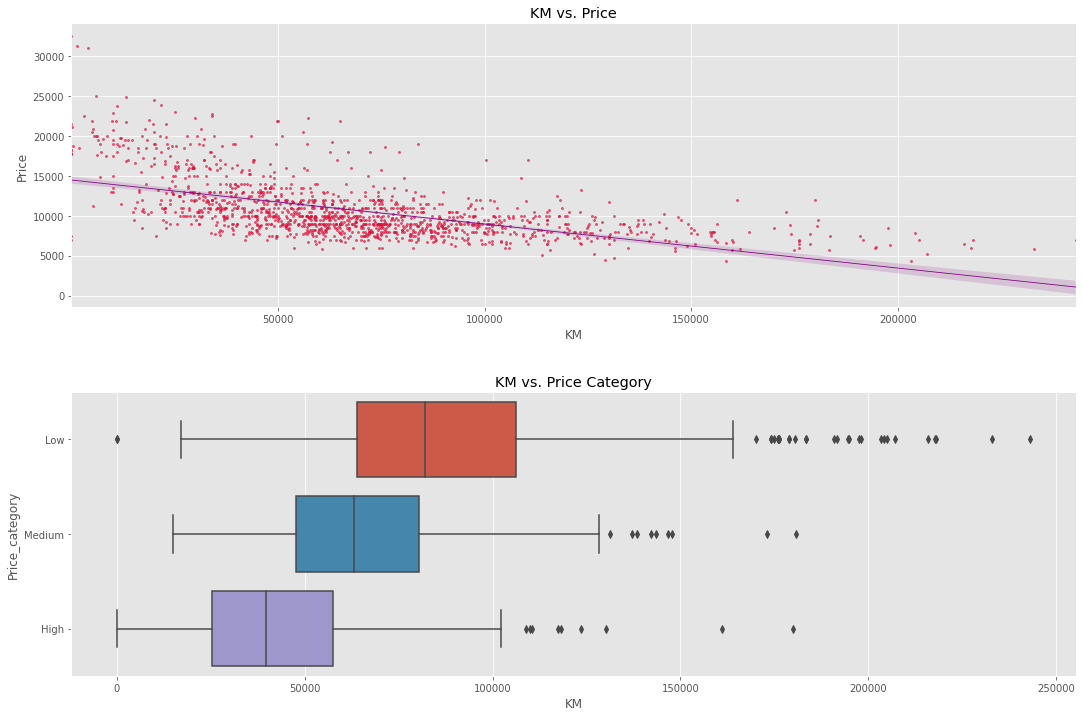

In [111]:
fig = plt.figure(figsize=(18,12))
plt.style.use('ggplot')

plt.subplot(2,1,1)
sns.regplot(x = toyota['KM'], y = toyota['Price'], scatter_kws={'alpha': .6, 's': 3.8}, color = 'crimson', order = 1, line_kws={'linewidth': .8, 'color': 'purple'})
plt.title('KM vs. Price')

plt.subplot(2,1,2)
sns.boxplot(x = toyota['KM'], y = toyota['Price_category'])
plt.title('KM vs. Price Category')

plt.subplots_adjust(hspace=.3)
plt.show()

***General Decrease in Price when the KM travelled increases.***

### Distribution of Fuel Type of the cars.

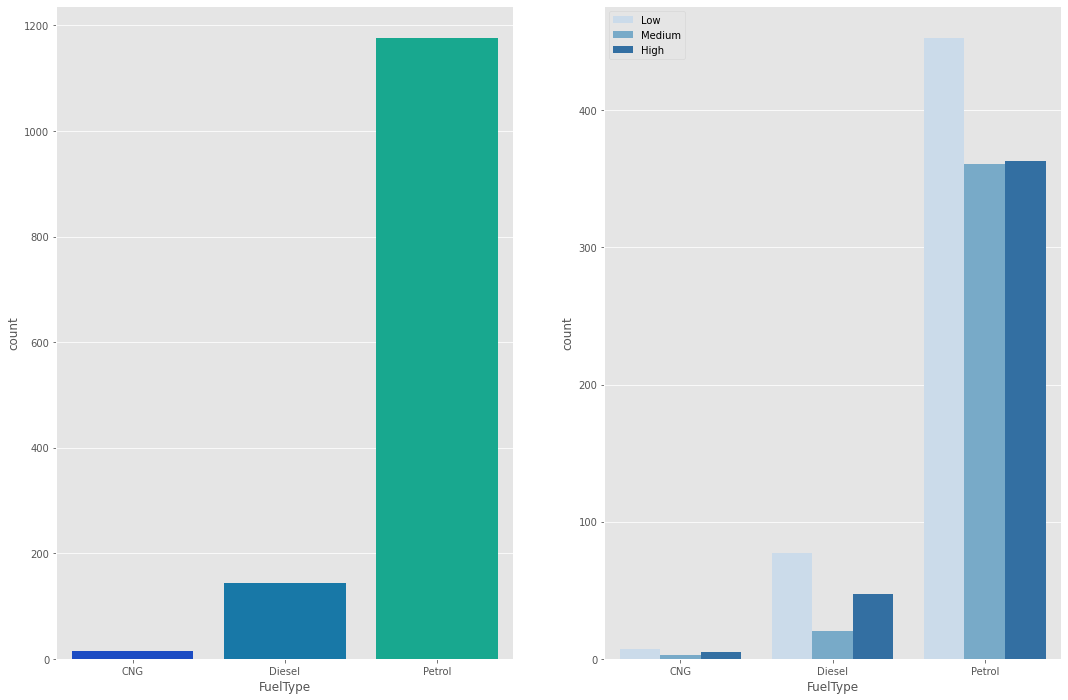

In [126]:
fig = plt.figure(figsize=(18,12))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.countplot(toyota['FuelType'], palette='winter')

plt.subplot(1,2,2)
sns.countplot(toyota['FuelType'], hue = toyota['Price_category'], palette='Blues')
plt.legend(loc = 'upper left')

plt.show()

***Maximum number of cars use Petrol as fuel.***<br>
***All of the fuel types have maximum number of lower prices.***

### Distribution of HorsePower.
- How does HP vary with the price?

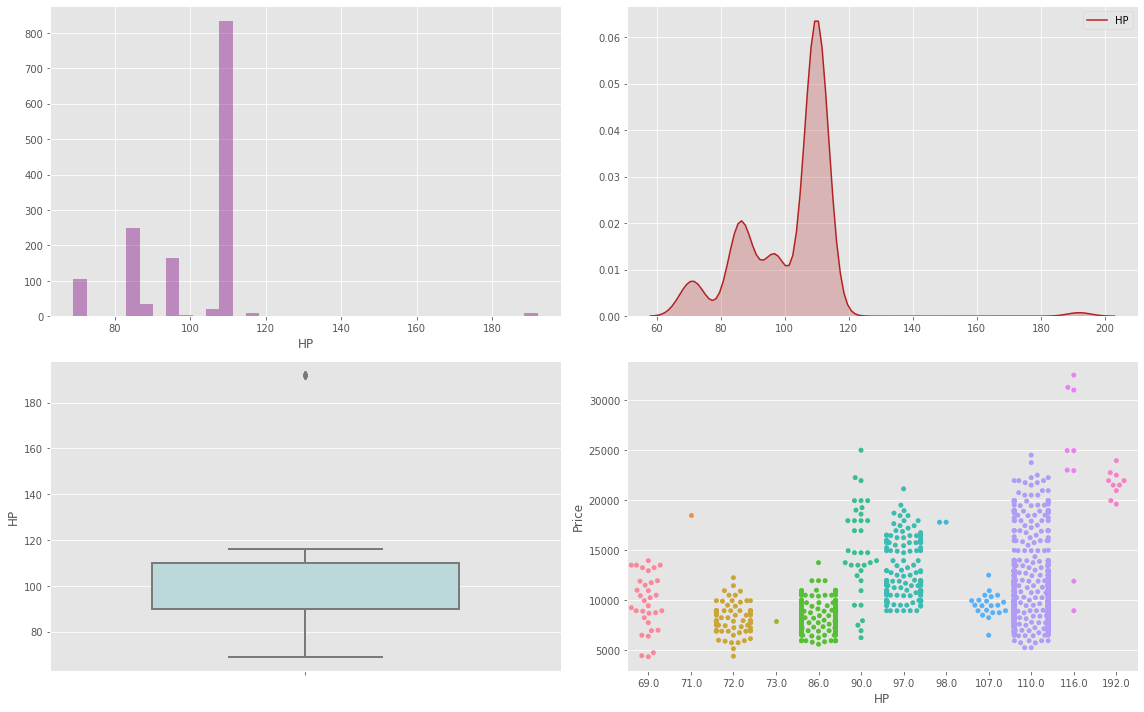

In [136]:
plt.figure(figsize=(16,10))
plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.distplot(toyota['HP'], kde = False, color = 'purple')

plt.subplot(2,2,2)
sns.kdeplot(toyota.HP, shade=True, color = 'firebrick', cumulative=False)

plt.subplot(2,2,3)
sns.boxplot(toyota.HP, width = .6, linewidth = 2, orient = 'v', color = 'powderblue', saturation = .6)

plt.subplot(2,2,4)
sns.swarmplot(x = 'HP', y = 'Price', data = toyota)

plt.tight_layout()
plt.show()

***Distribution is uneven/ skewed.***<br>
***Presence of outliers.***<br>
***Cars with HP == 110.0 seem to have greater frequency than the rest and their price range is also large.***<br>
***Cars with lower HorsePower have lower prices.***<br>

### Visualizing MetColor.

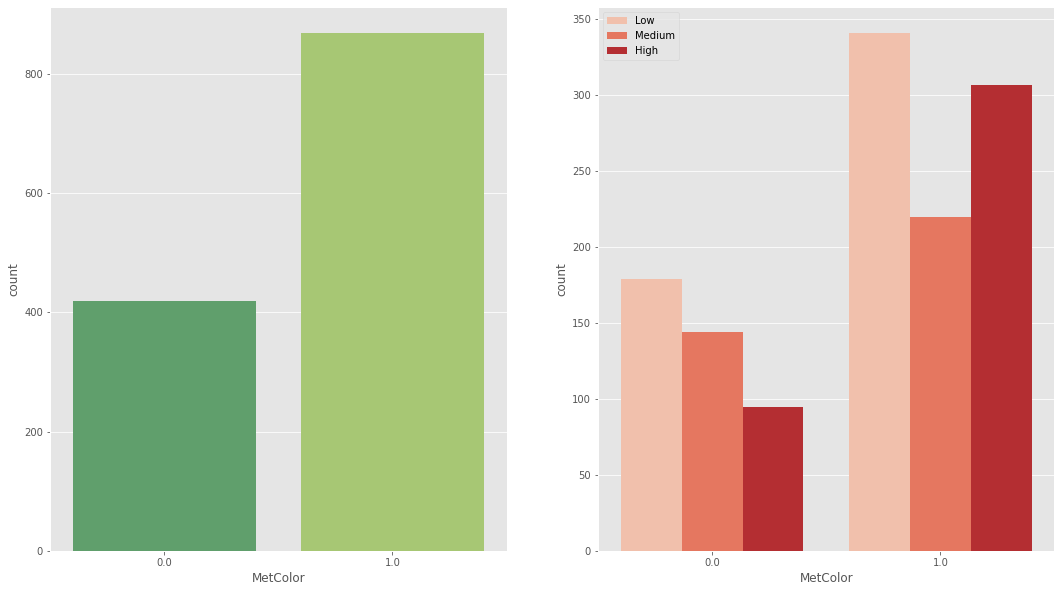

In [149]:
fig = plt.figure(figsize=(18,10))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.countplot(toyota['MetColor'], palette='summer')

plt.subplot(1,2,2)
sns.countplot(toyota['MetColor'], hue = toyota['Price_category'], palette='Reds')
plt.legend(loc = 'upper left')

plt.show()

### Visualizing Automatic.

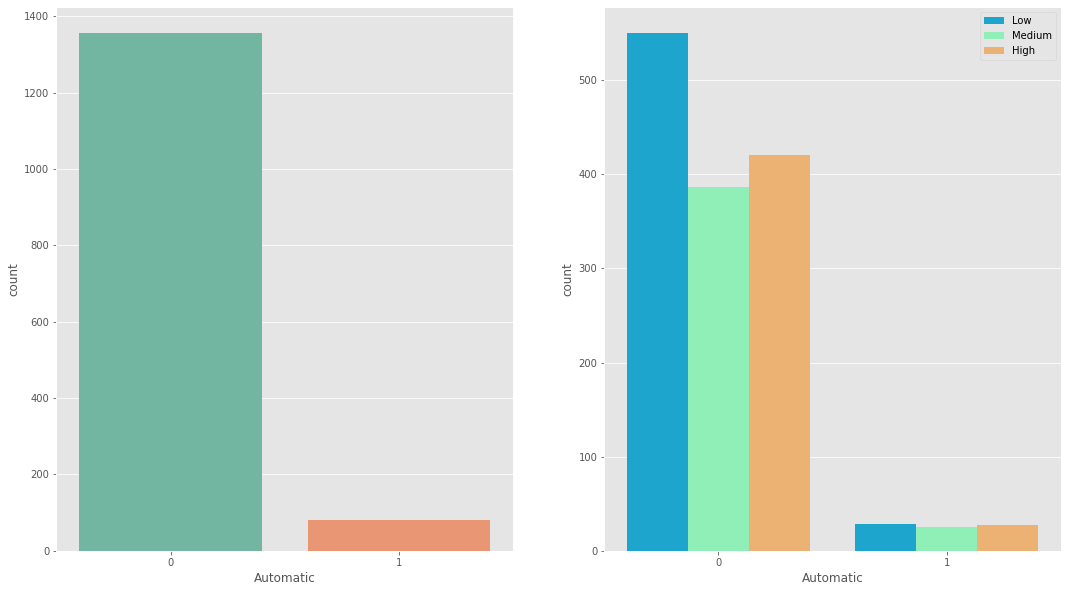

In [147]:
fig = plt.figure(figsize=(18,10))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.countplot(toyota['Automatic'], palette='Set2')

plt.subplot(1,2,2)
sns.countplot(toyota['Automatic'], hue = toyota['Price_category'], palette='rainbow')
plt.legend(loc = 'upper right')

plt.show()

### Distribution of CC.

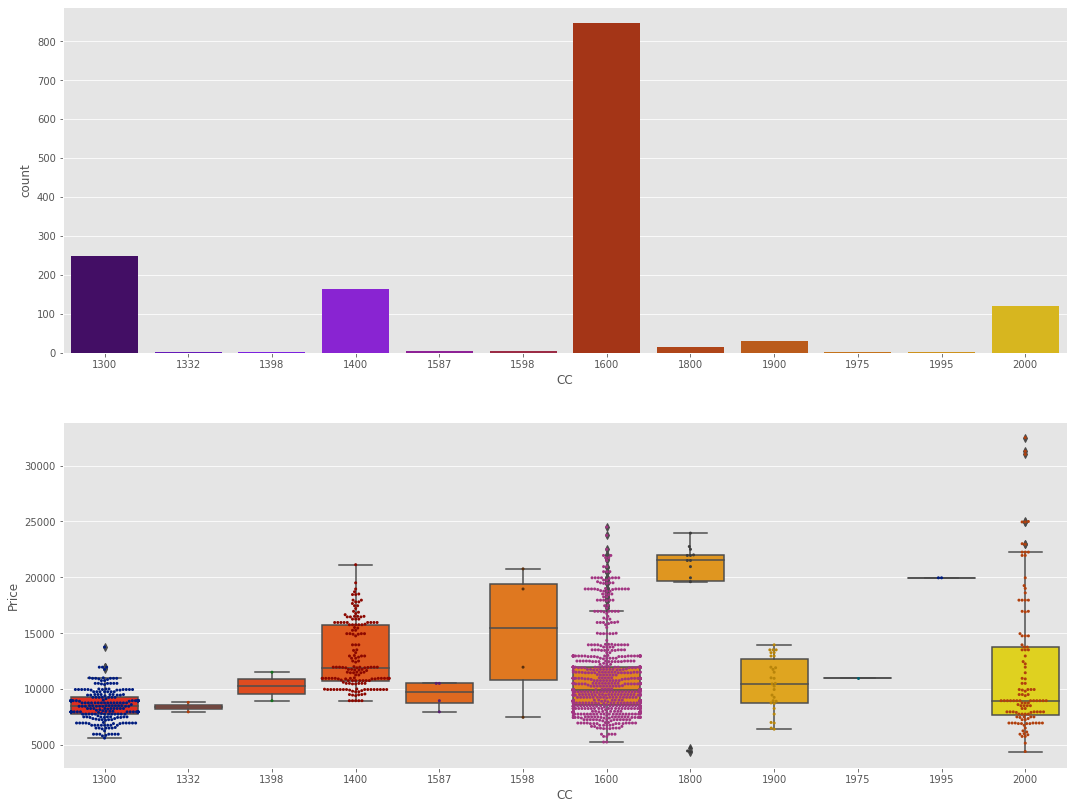

In [175]:
plt.figure(figsize=(18,14))
plt.style.use('ggplot')

plt.subplot(2,1,1)
sns.countplot(toyota.CC, palette = 'gnuplot')

plt.subplot(2,1,2)
sns.swarmplot(x = 'CC', y = 'Price', data = toyota, palette = 'dark', size=3)
sns.boxplot(x = 'CC', y = 'Price', data = toyota, palette = 'autumn')

plt.show()

In [166]:
# Value counts.
toyota.CC.value_counts()

1600    846
1300    248
1400    164
2000    119
1900     30
1800     14
1598      4
1587      4
1995      2
1398      2
1332      2
1975      1
Name: CC, dtype: int64

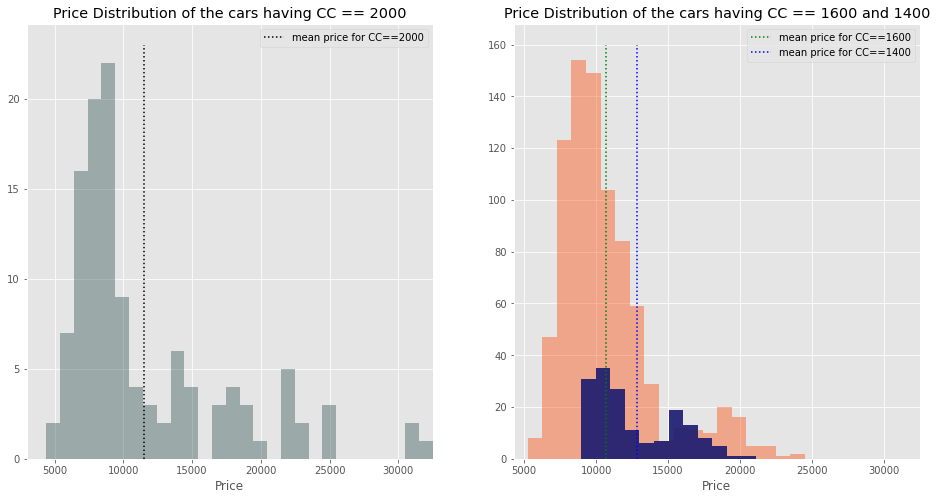

In [195]:
# We check for the variation of price of cars having CC==2000.
fig = plt.figure(figsize=(16,8))
plt.style.use('ggplot')

plt.subplot(1,2,1)
cars_2000CC = toyota[['Price', 'Price_category']][toyota['CC'] == 2000]
sns.distplot(cars_2000CC['Price'], kde = False, bins = int((cars_2000CC['Price'].max() - cars_2000CC['Price'].min()) / 1000), color = 'darkslategray')
plt.vlines(cars_2000CC['Price'].mean(), 0, 23, color = 'black', linestyles='dotted', label='mean price for CC==2000')

plt.title('Price Distribution of the cars having CC == 2000')
plt.xlim(right = toyota['Price'].max())
plt.legend(loc = 'upper right')

##################################################
plt.subplot(1,2,2)
cars_1600CC = toyota[['Price', 'Price_category']][toyota['CC'] == 1600]
cars_1400CC = toyota[['Price', 'Price_category']][toyota['CC'] == 1400]

sns.distplot(cars_1600CC['Price'], kde = False, bins = int((cars_1600CC['Price'].max() - cars_1600CC['Price'].min()) / 1000), color = 'orangered')
sns.distplot(cars_1400CC['Price'], kde = False, bins = int((cars_1400CC['Price'].max() - cars_1400CC['Price'].min()) / 1000), color = 'midnightblue', hist_kws={'alpha':.9})
plt.vlines(cars_1600CC['Price'].mean(), 0, 160, color = 'green', linestyles='dotted', label='mean price for CC==1600')
plt.vlines(cars_1400CC['Price'].mean(), 0, 160, color = 'blue', linestyles='dotted', label='mean price for CC==1400')

plt.title('Price Distribution of the cars having CC == 1600 and 1400')
plt.xlim(right = toyota['Price'].max())
plt.legend(loc = 'upper right')

plt.show()

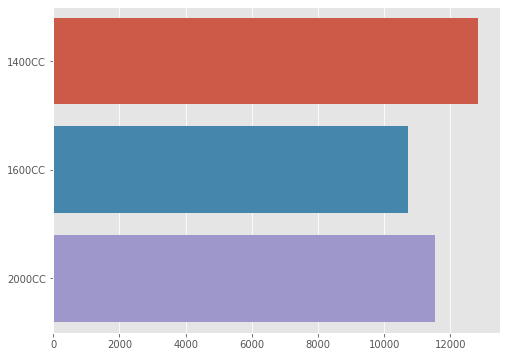

In [205]:
# Comparision of mean prices of cars having 1400 CC, 1600 CC and 2000 CC engines.
plt.figure(figsize=(8,6))
avg_price_dict = {'1400CC':cars_1400CC['Price'].mean(), '1600CC':cars_1600CC['Price'].mean(), '2000CC':cars_2000CC['Price'].mean()}
sns.barplot(x = list(avg_price_dict.values()), y = list(avg_price_dict.keys()))
plt.show()

***Low CC ==> Low Price***<br>
***Higher CC doesn't necessarily mean higher price (e.g CC == 2000)***<br>
***The mean price of 1400 CC vehicle is greater than that of 1600 CC vehicle and 2000 CC vehicle.***




### Distribution of Weight of cars.

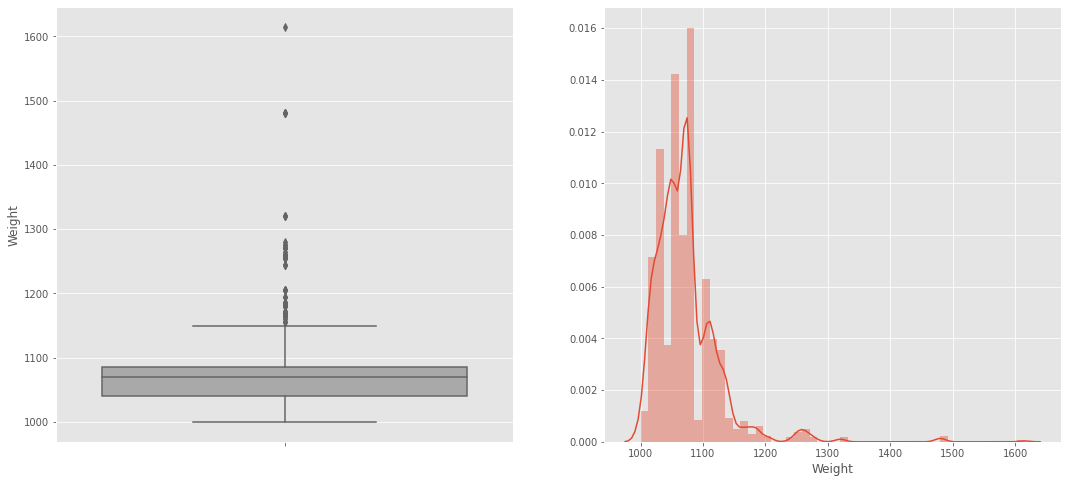

In [214]:
plt.figure(figsize=(18,8))
plt.style.use('ggplot')

plt.subplot(1,2,1)
#sns.swarmplot(toyota.Weight,color = 'purple', alpha = .4, orient = 'v')
sns.boxplot(toyota.Weight, color = 'darkgray', orient = 'v')

plt.subplot(1,2,2)
sns.distplot(toyota.Weight)
plt.show()

***Skewed to the right.***



###  Weight vs. Price.
- How does the price vary with weight?

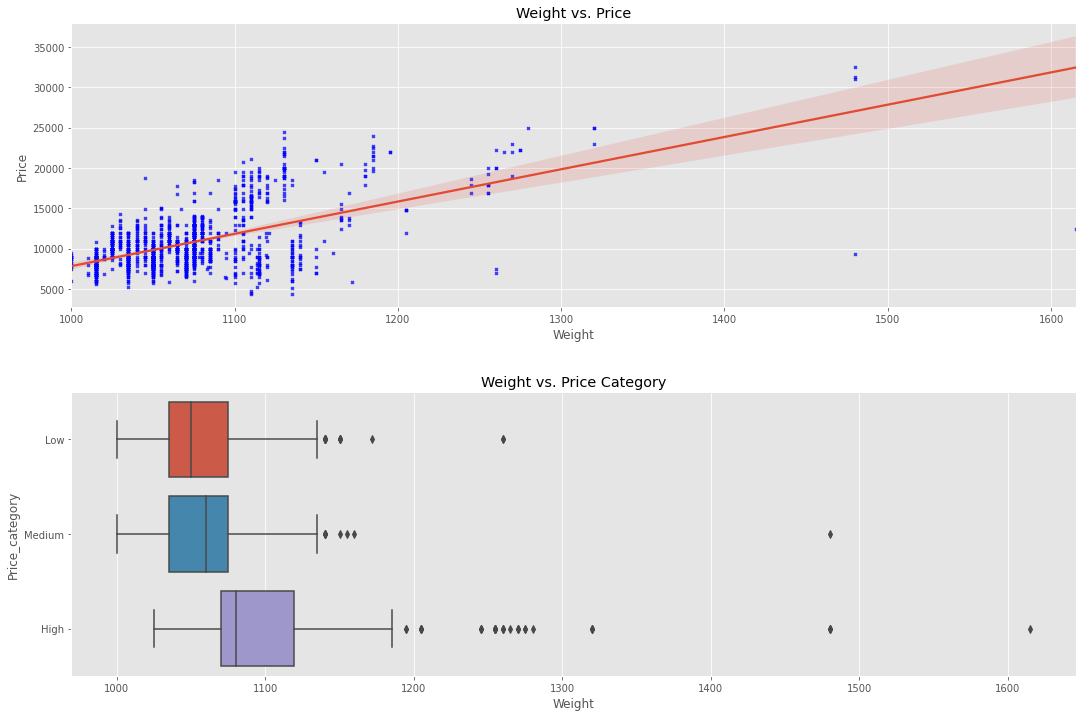

In [215]:
fig = plt.figure(figsize=(18,12))
plt.style.use('ggplot')

plt.subplot(2,1,1)
sns.regplot(x = toyota['Weight'], y = toyota['Price'], scatter_kws={'alpha': .6, 's': 8, 'color': 'blue'}, marker = 'X', order = 1)
plt.title('Weight vs. Price')

plt.subplot(2,1,2)
sns.boxplot(x = toyota['Weight'], y = toyota['Price_category'])
plt.title('Weight vs. Price Category')

plt.subplots_adjust(hspace=.3)
plt.show()

***Greater the weight, higher the price.***

### Visualizing the number of doors.
- How does the number of doors in a car affect its price?

In [217]:
toyota['Doors'].unique()

array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

In [232]:
# First cleaning the data.
def words2num(word):
    if word == 'three':
        return '3'
    elif word == 'four':
        return '4'
    elif word == 'five':
        return '5'
    else:
        return word

# Applying the transformation.
toyota['Doors'] = toyota['Doors'].apply(words2num)
toyota['Doors'] = toyota['Doors'].astype('category')

print(toyota['Doors'].unique())
print()
print(toyota.Doors.value_counts())

[3, 5, 4, 2]
Categories (4, object): [3, 5, 4, 2]

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64


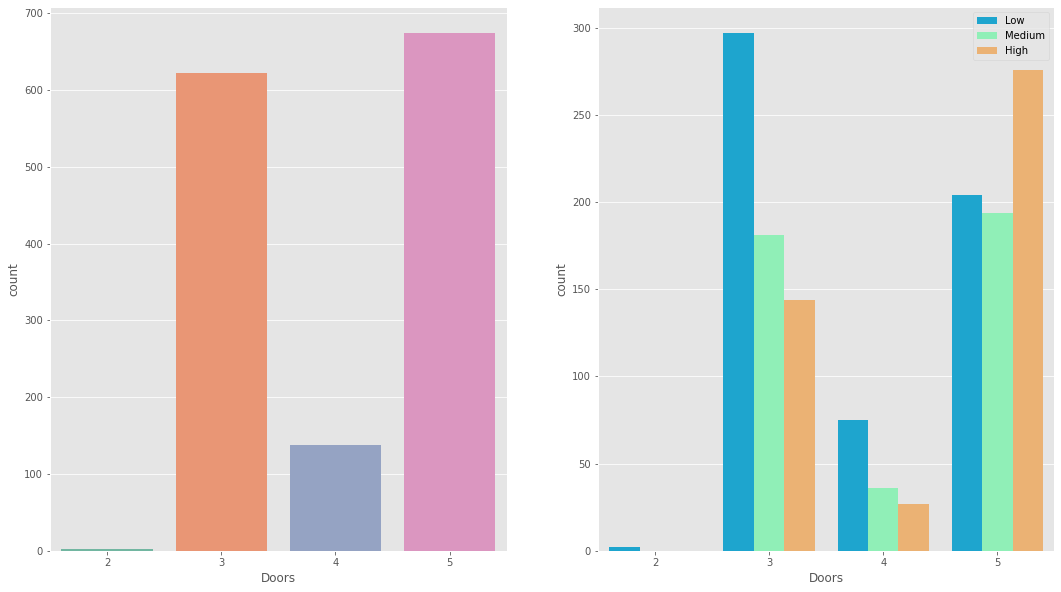

In [231]:
fig = plt.figure(figsize=(18,10))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.countplot(toyota['Doors'], palette='Set2')

plt.subplot(1,2,2)
sns.countplot(toyota['Doors'], hue = toyota['Price_category'], palette='rainbow')
plt.legend(loc = 'upper right')

plt.show()

***Those cars with 2 doors fall on low price category.***<br>
***Those cars with 3 doors are mostly inexpensive.***<br>
***Those cars with 5 doors are expensive.***<br>

End of visual analysis.
<hr><hr>

# Data Cleaning.

### Handling the missing values.

In [237]:
from copy import deepcopy
df_cleaned = deepcopy(toyota)

#### Cleaning the Age column.

In [276]:
# Imputing by median.
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace = True)

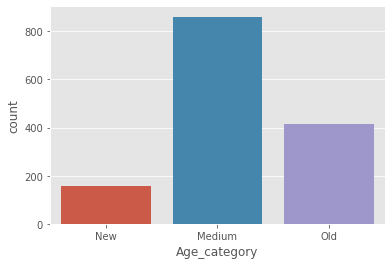

In [277]:
# Creating a new column for storing the age based on categories {'new', 'medium', 'old'}.

p1, p2 = tuple(np.array(np.nanpercentile(df_cleaned.Age.unique(), q=[33, 67], keepdims=False), dtype=np.float32))   # Two partition values: 33rd and 67th percentile of the unique values of age.

def determine_age_category(age):
    if age<=p1:
        return 'New'
    elif age>p1 and age<= 67:
        return 'Medium'
    elif age>67:
        return 'Old'
    elif age == np.nan:
        return np.nan

df_cleaned['Age_category'] = df_cleaned['Age'].apply(determine_age_category)
df_cleaned['Age_category'].unique()

sns.countplot(df_cleaned.Age_category)
plt.show()

In [278]:
df_cleaned['Age'].isnull().sum()

0

#### Cleaning the KM column.

In [284]:
# We impute the KM column based on the age category of the vehicle.

df_cleaned['KM'] = df_cleaned[['KM', 'Age_category']].groupby(by =  'Age_category').transform(lambda x: x.fillna(x.mean()))

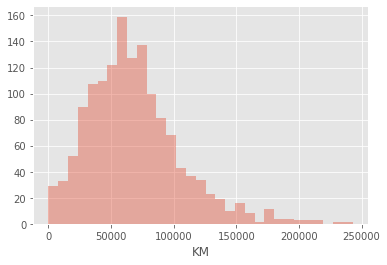

In [285]:
sns.distplot(df_cleaned['KM'], kde = False)

#### Cleaning FuelType.

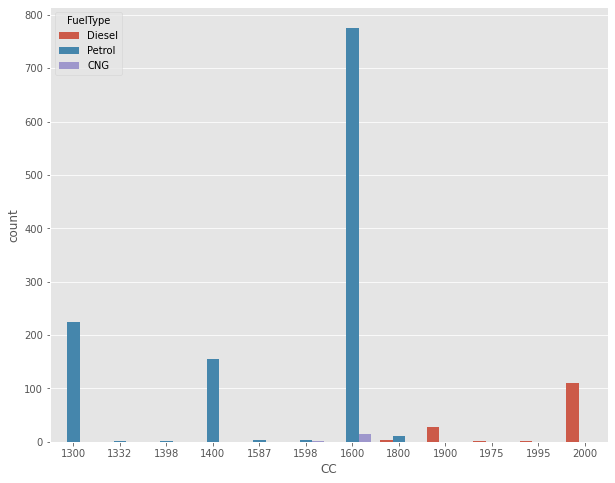

In [287]:
plt.figure(figsize=(10,8))
sns.countplot(df_cleaned['CC'], hue = df_cleaned['FuelType'])

***We can see that if the CC <= 1800, Petrol Engine is used & CNG is used and if CC > 1600, Diesel Engine is used.***

In [331]:
# Imputing the FuelType using above logic.
for ii, (cc, fuel) in enumerate(zip(df_cleaned['CC'], df_cleaned['FuelType'])):
    if fuel is np.nan:
        if cc<=1800:
            df_cleaned.loc[ii, 'FuelType'] = 'Petrol'
        else:
            df_cleaned.loc[ii, 'FuelType'] = 'Diesel'

df_cleaned['FuelType'].isnull().sum()

0

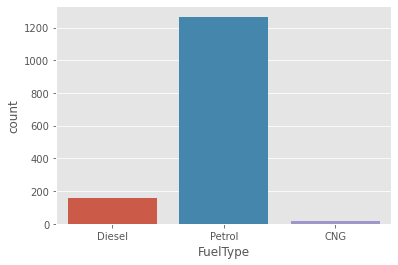

In [334]:
sns.countplot(df_cleaned['FuelType'])

#### Cleaning HP.
- Imputation by median.

In [342]:
df_cleaned['HP'].fillna(df_cleaned['HP'].median(), inplace = True)

In [343]:
df_cleaned['HP'].isnull().sum()

0

#### Cleaning MetColor.

In [356]:
df_cleaned['MetColor'].fillna(0.0, inplace = True)
df_cleaned['MetColor'].isnull().sum()

0

### Final Check for confirmation.

In [357]:
df_cleaned.isnull().sum()

Price             0
Age               0
KM                0
FuelType          0
HP                0
MetColor          0
Automatic         0
CC                0
Doors             0
Weight            0
Price_category    0
Age_category      0
dtype: int64

# Pickling the cleaned DataFrame to be used in the learning model.

In [360]:
df_cleaned.to_pickle('toyota_cleaned.pkl')
files.download('toyota_cleaned.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# The End.